<a href="https://colab.research.google.com/github/akshayy-ai/Machine-Learning/blob/main/Medical_Insurance_Cost_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Which Factors Influence the Price of Health Insurance?**

1. Age
2. Sex
3. BMI
4. Nos of Children
5. Smoking Habit
6. Region




In [5]:
#importing necessory libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
#Load the dataset

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [11]:
# Check Null Values
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


We have 0 missing values that's pretty good

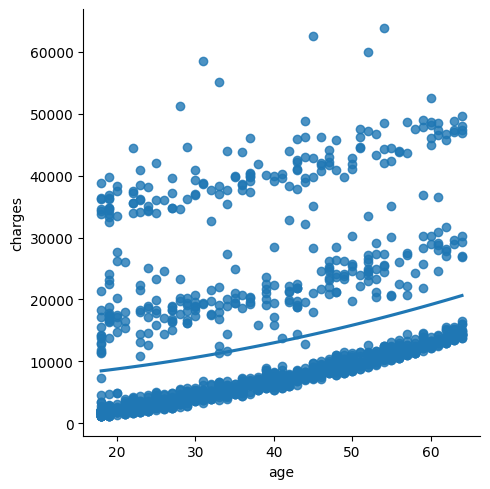

In [31]:
#Let's analyze the charges by age
sns.lmplot(x="age",y='charges',data=df,order=2,ci=None)

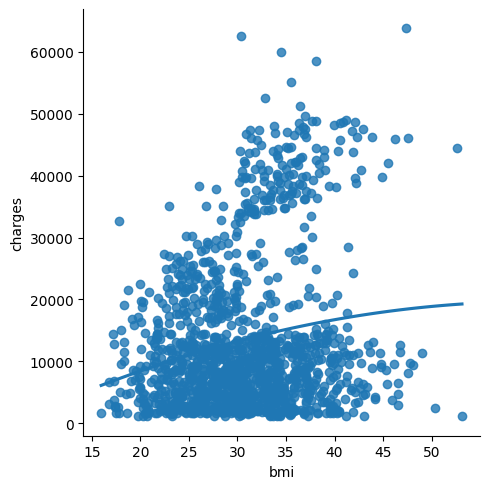

In [34]:
#Let's analyze the charges by bmi
sns.lmplot(x="bmi",y='charges',data=df,order=2,ci=None)

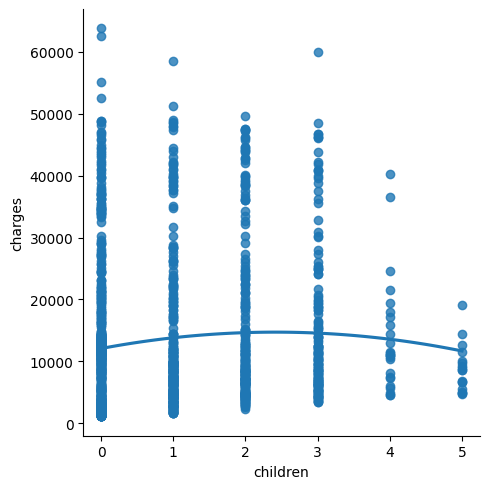

In [33]:
#Let's analyze the charges by children
sns.lmplot(x="children",y='charges',data=df,order=2,ci=None)

In [18]:
# Let's convert object labels into categorical

df[['sex','smoker','region']]=df[['sex','smoker','region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [20]:
# Converting Catergorical Labels into Numerical

from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex=label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker=label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region=label.transform(df.region)
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


/usr/local/lib/python3.10/dist-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


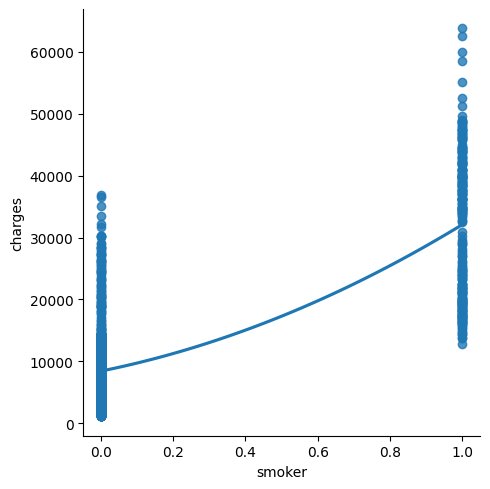

In [32]:
# Let's check charges by smoking as well
sns.lmplot(x="smoker",y='charges',data=df,order=2,ci=None) # Smoking is having high impact

In [37]:
# Create Binary Dataframe for Linear Regression
df_binary=df[['bmi','charges']]
df_binary.head()

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520


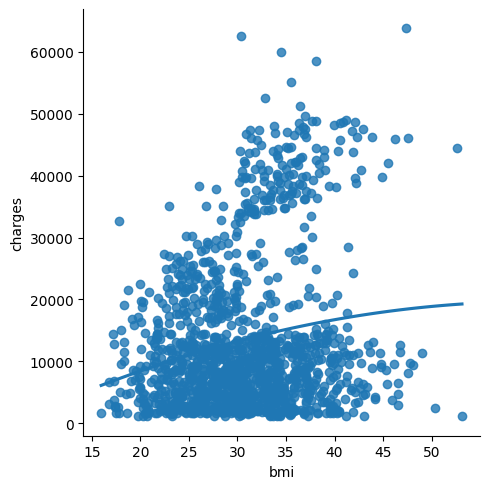

In [38]:
# Plotting the binary dataframe
sns.lmplot(x="bmi",y='charges',data=df_binary,order=2,ci=None)


In [40]:
x= np.array(df_binary['bmi']).reshape(-1,1)
y=np.array(df_binary['charges']).reshape(-1,1)


In [41]:
# Splitting the dataset
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.25)

In [44]:
# Fitting the model
reg = LinearRegression()
reg.fit(x_train,x_test)

LinearRegression()

In [46]:
y_pred=reg.predict(y_train)
y_pred

array([[13233.11744888],
       [12070.40986215],
       [13115.6722381 ],
       [11774.83941502],
       [14229.44432034],
       [14341.01727058],
       [13037.37543091],
       [ 8985.51565898],
       [15946.10181792],
       [13225.28776816],
       [15679.89267348],
       [11031.01974674],
       [10101.24516139],
       [ 9443.55198102],
       [14489.78120423],
       [12998.22702732],
       [16376.73425745],
       [12332.70416623],
       [15214.02667072],
       [14341.01727058],
       [15940.22955738],
       [14638.54513789],
       [15601.59586629],
       [13745.96153596],
       [14055.23392435],
       [13262.47875158],
       [13671.57956913],
       [14043.48940327],
       [12371.85256982],
       [11079.95525123],
       [14564.16317106],
       [13820.34350278],
       [13233.11744888],
       [16312.13939152],
       [13039.33285109],
       [ 8241.6959907 ],
       [13820.34350278],
       [14642.45997825],
       [16075.29154977],
       [11314.84567279],


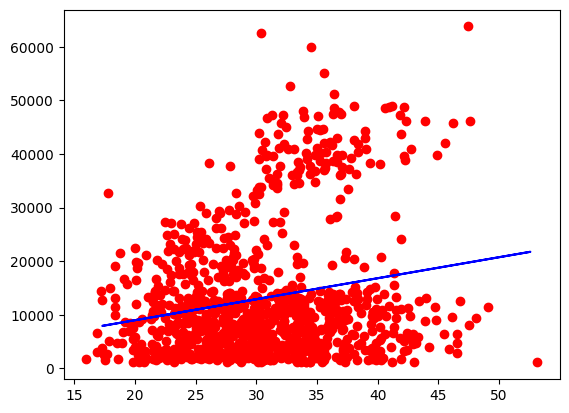

In [47]:
plt.scatter(x_train,x_test,color='red')
plt.plot(y_train,y_pred,color='blue')
plt.show()